<a href="https://colab.research.google.com/github/ArpanSM/MachineLearningHackathons/blob/master/HackerEarth_DanceForm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries and Data

In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-identify-dance-form/identify-the-dance-form-deea77f8/0664343c9a8f11ea.zip
!unzip 0664343c9a8f11ea.zip

--2020-06-18 09:11:25--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-identify-dance-form/identify-the-dance-form-deea77f8/0664343c9a8f11ea.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.124.132
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.124.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27882564 (27M) [application/zip]
Saving to: ‘0664343c9a8f11ea.zip’

0664343c9a8f11ea.zi 100%[===================>]  26.59M  32.6MB/s    in 0.8s    

2020-06-18 09:11:26 (32.6 MB/s) - ‘0664343c9a8f11ea.zip’ saved [27882564/27882564]

Archive:  0664343c9a8f11ea.zip
   creating: dataset/
   creating: dataset/test/
  inflating: dataset/test/508.jpg    
  inflating: dataset/test/246.jpg    
  inflating: dataset/test/473.jpg    
  inflating: dataset/test/485.jpg    
  inflating: dataset/test/128.jpg    
  inflating: dataset/test/410.jpg    
  inflating: dataset/test/465.jpg    
  inflating:

#AutoKeras

In [ ]:
#!pip install autokeras
#!pip install tensorflow==2.1.0

##Data Preprocessing

In [ ]:
labels = pd.read_csv('/content/dataset/train.csv')
print(labels.head())
labels_test = pd.read_csv('/content/dataset/test.csv')
print(labels_test.head())

     Image         target
0   96.jpg       manipuri
1  163.jpg  bharatanatyam
2  450.jpg         odissi
3  219.jpg      kathakali
4  455.jpg         odissi
     Image
0  508.jpg
1  246.jpg
2  473.jpg
3  485.jpg
4  128.jpg


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels['label'] = le.fit_transform(labels['target'])
labels.head(10)

,Image,target,label
0,96.jpg,manipuri,4
1,163.jpg,bharatanatyam,0
2,450.jpg,odissi,6
3,219.jpg,kathakali,2
4,455.jpg,odissi,6
5,46.jpg,kathak,1
6,326.jpg,sattriya,7
7,408.jpg,kuchipudi,3
8,365.jpg,sattriya,7
9,422.jpg,kuchipudi,3


In [ ]:
train_image = []
for i in tqdm(range(labels.shape[0])):
    img = image.load_img('/content/dataset/train/'+labels['Image'][i],target_size=(400,400,3),color_mode="grayscale")
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
print("--------------------------------------------")
print("--------------------------------------------")
print(f'X.shape--> {X.shape}')
print("--------------------------------------------")
print("--------------------------------------------")
y = np.array(labels.drop(['Image', 'target'],axis=1))
print(f'y.shape--> {y.shape}')

100%|██████████| 364/364 [00:02<00:00, 145.30it/s]


--------------------------------------------
--------------------------------------------
X.shape--> (364, 400, 400, 1)
--------------------------------------------
--------------------------------------------
y.shape--> (364, 1)


In [ ]:
test_image = []
for i in tqdm(range(labels_test.shape[0])):
    img = image.load_img('/content/dataset/test/'+labels_test['Image'][i],target_size=(400,400,3),color_mode="grayscale")
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X_test = np.array(test_image)
print("--------------------------------------------")
print("--------------------------------------------")
print(f'X_test.shape--> {X_test.shape}')
print("--------------------------------------------")
print("--------------------------------------------")
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],X_test.shape[2])
print("X_test.shape -  reshaped -->",X_test.shape)

100%|██████████| 156/156 [00:01<00:00, 133.67it/s]

--------------------------------------------
--------------------------------------------
X_test.shape--> (156, 400, 400, 1)
--------------------------------------------
--------------------------------------------
X_test.shape -  reshaped --> (156, 400, 400)


In [ ]:
#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

# reshape to (-1,img_size,img_size) and (-1,)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],x_test.shape[2])
y_train = y_train.reshape(y_train.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)
print("x_train.shape-->",x_train.shape)
print("--------------------------------------------") 
print("y_train.shape-->",y_train.shape)
print("--------------------------------------------") 
print("x_test.shape-->",x_test.shape)
print("--------------------------------------------")
print("y_test.shape-->",y_test.shape) 

x_train.shape--> (327, 400, 400)
--------------------------------------------
y_train.shape--> (327,)
--------------------------------------------
x_test.shape--> (37, 400, 400)
--------------------------------------------
y_test.shape--> (37,)


##Training

In [ ]:
import autokeras as ak

In [ ]:
# Initialize the image classifier.
clf = ak.ImageClassifier() # It tries 10 different models.
# Feed the image classifier with training data.
clf.fit(x_train, y_train,epochs=1000,validation_split=0.3)

Train for 8 steps, validate for 4 steps
Epoch 1/1000
8/8 [==============================] - 9s 1s/step - loss: 35.9301 - accuracy: 0.1528 - val_loss: 9.8873 - val_accuracy: 0.1633
Epoch 2/1000
8/8 [==============================] - 4s 460ms/step - loss: 5.5653 - accuracy: 0.2576 - val_loss: 2.6631 - val_accuracy: 0.1429
Epoch 3/1000
8/8 [==============================] - 4s 455ms/step - loss: 0.9027 - accuracy: 0.7031 - val_loss: 1.9353 - val_accuracy: 0.3163
Epoch 4/1000
8/8 [==============================] - 4s 458ms/step - loss: 0.2133 - accuracy: 0.9956 - val_loss: 1.3801 - val_accuracy: 0.4082
Epoch 5/1000
8/8 [==============================] - 3s 403ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 1.5725 - val_accuracy: 0.3980
Epoch 6/1000
8/8 [==============================] - 3s 404ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 3.1002 - val_accuracy: 0.3061
Epoch 7/1000
8/8 [==============================] - 3s 402ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss

Train for 8 steps, validate for 4 steps
Epoch 1/1000
8/8 [==============================] - 23s 3s/step - loss: 2.6807 - accuracy: 0.2052 - val_loss: 42.8985 - val_accuracy: 0.0816
Epoch 2/1000
8/8 [==============================] - 7s 896ms/step - loss: 2.0226 - accuracy: 0.2314 - val_loss: 47.9986 - val_accuracy: 0.1735
Epoch 3/1000
8/8 [==============================] - 7s 887ms/step - loss: 1.8483 - accuracy: 0.2533 - val_loss: 701.5908 - val_accuracy: 0.2041
Epoch 4/1000
8/8 [==============================] - 8s 999ms/step - loss: 1.7440 - accuracy: 0.2838 - val_loss: 35.8185 - val_accuracy: 0.0918
Epoch 5/1000
8/8 [==============================] - 8s 988ms/step - loss: 1.6222 - accuracy: 0.2969 - val_loss: 2.2828 - val_accuracy: 0.0714
Epoch 6/1000
8/8 [==============================] - 7s 891ms/step - loss: 1.5056 - accuracy: 0.3581 - val_loss: 2.5125 - val_accuracy: 0.0714
Epoch 7/1000
8/8 [==============================] - 7s 890ms/step - loss: 1.4315 - accuracy: 0.4367 - val

Train for 8 steps, validate for 4 steps
Epoch 1/1000
8/8 [==============================] - 4s 514ms/step - loss: 39.2108 - accuracy: 0.1572 - val_loss: 8.4456 - val_accuracy: 0.2041
Epoch 2/1000
8/8 [==============================] - 4s 460ms/step - loss: 4.9486 - accuracy: 0.2707 - val_loss: 3.0191 - val_accuracy: 0.0918
Epoch 3/1000
8/8 [==============================] - 4s 455ms/step - loss: 1.2039 - accuracy: 0.5022 - val_loss: 2.1702 - val_accuracy: 0.2449
Epoch 4/1000
8/8 [==============================] - 4s 456ms/step - loss: 0.4275 - accuracy: 0.9694 - val_loss: 2.0221 - val_accuracy: 0.3673
Epoch 5/1000
8/8 [==============================] - 4s 458ms/step - loss: 0.1501 - accuracy: 0.9694 - val_loss: 1.9284 - val_accuracy: 0.3367
Epoch 6/1000
8/8 [==============================] - 3s 403ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 2.6740 - val_accuracy: 0.3061
Epoch 7/1000
8/8 [==============================] - 3s 400ms/step - loss: 0.0081 - accuracy: 1.0000 - val_l

INFO:tensorflow:Oracle triggered exit
Train for 12 steps, validate for 4 steps
Epoch 1/1000
12/12 [==============================] - 5s 421ms/step - loss: 22.6096 - accuracy: 0.1682 - val_loss: 1.8844 - val_accuracy: 0.3163
Epoch 2/1000
12/12 [==============================] - 4s 367ms/step - loss: 1.6350 - accuracy: 0.3853 - val_loss: 1.1693 - val_accuracy: 0.8265
Epoch 3/1000
12/12 [==============================] - 4s 367ms/step - loss: 0.7140 - accuracy: 0.9572 - val_loss: 0.2154 - val_accuracy: 0.9592
Epoch 4/1000
12/12 [==============================] - 4s 365ms/step - loss: 0.0896 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 5/1000
12/12 [==============================] - 4s 367ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 6/1000
12/12 [==============================] - 4s 365ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/1000
12/12 [==============================] - 4s

In [ ]:
clf.export_model()

##Testing

In [ ]:
output = clf.predict(X_test, batch_size=32)

In [ ]:
dataset = pd.DataFrame({'Out_Target': output[:, 0]})
dataset.head()

,Out_Target
0,7
1,2
2,7
3,6
4,3


In [ ]:
dataset["Out_Target"].replace({0: "bharatanatyam",
                               1: "kathak",
                               2: "kathakali",
                               3: "kuchipudi",
                               4: "manipuri",
                               5: "mohiniyattam",
                               6: "odissi",
                               7: "sattriya",
                               }, inplace=True)
dataset.head()

,Out_Target
0,sattriya
1,kathakali
2,sattriya
3,odissi
4,kuchipudi


In [ ]:
labels_test["target"] = dataset["Out_Target"]
labels_test.head()

,Image,target
0,508.jpg,sattriya
1,246.jpg,kathakali
2,473.jpg,sattriya
3,485.jpg,odissi
4,128.jpg,kuchipudi


In [ ]:
labels_test.to_csv("output.csv",index=False)
output = pd.read_csv("output.csv")
output.head()

,Image,target
0,508.jpg,sattriya
1,246.jpg,kathakali
2,473.jpg,sattriya
3,485.jpg,odissi
4,128.jpg,kuchipudi


##Kill Process

In [ ]:
!nvidia-smi

Mon Jun  1 19:37:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    32W /  70W |  14839MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
!ps -aux|grep python

root          19  0.8  0.7 415324 106220 ?       Sl   19:10   0:13 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --MappingKernelManager.root_dir="/content"
root         226 34.9 39.8 27649844 5309872 ?    Ssl  19:13   8:33 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-c19861c6-f2c3-498e-aa2e-c327d97839a7.json
root        1506  0.0  0.0  39196  6568 ?        S    19:38   0:00 /bin/bash -c ps -aux|grep python


In [ ]:
!kill -9 226 

#Keras Pre-Trained

##Pre - Trained Method

In [ ]:
import os
import sys
import cv2
import keras
import shutil
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
!pip install livelossplot
from keras.utils import np_utils
from keras.regularizers import l2
from keras.preprocessing import image
from keras.optimizers import Adam,SGD
from livelossplot import PlotLossesKeras
from keras.models import Sequential,Model
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten,GlobalAveragePooling2D,Conv2D,MaxPooling2D
import warnings
warnings.filterwarnings("ignore")
!git clone https://github.com/bckenstler/CLR.git
from CLR.clr_callback import CyclicLR

Using TensorFlow backend.


Cloning into 'CLR'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 252 (delta 1), reused 4 (delta 0), pack-reused 244
Receiving objects: 100% (252/252), 2.06 MiB | 1.92 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [ ]:
#input data
df=pd.read_csv("/content/dataset/train.csv")
dft=pd.read_csv("/content/dataset/test.csv")

In [ ]:
df.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [ ]:
one_hot = pd.get_dummies(df['target'])
df = df.drop('target',axis = 1)
df = df.join(one_hot)

In [ ]:
print(df.head(5))
print("---------------------------------------------------------")
print(dft.head(5))

     Image  bharatanatyam  kathak  ...  mohiniyattam  odissi  sattriya
0   96.jpg              0       0  ...             0       0         0
1  163.jpg              1       0  ...             0       0         0
2  450.jpg              0       0  ...             0       1         0
3  219.jpg              0       0  ...             0       0         0
4  455.jpg              0       0  ...             0       1         0

[5 rows x 9 columns]
---------------------------------------------------------
     Image
0  508.jpg
1  246.jpg
2  473.jpg
3  485.jpg
4  128.jpg


In [ ]:
pretrained(model="ResNet50", batch_size=8, epochs=500)

Resizing Image
Image Shape ----> (364, 384, 384, 3)
ResNet50
94658560/94653016 [==============================] - 8s 0us/step
Train-Val Split - 20%
Performing Data Augmentation
Found 291 validated image filenames.
Found 73 validated image filenames.
Found 156 validated image filenames.
Success
Epoch 1/500
200/200 [==============================] - 282s 1s/step - loss: 2.8825 - accuracy: 0.1721 - val_loss: 1.8176 - val_accuracy: 0.1233

Epoch 00001: val_accuracy improved from -inf to 0.12329, saving model to ./model.01-1.82-0.12.h5
Epoch 2/500
200/200 [==============================] - 252s 1s/step - loss: 2.3573 - accuracy: 0.2618 - val_loss: 2.0200 - val_accuracy: 0.1644

Epoch 00002: val_accuracy improved from 0.12329 to 0.16438, saving model to ./model.02-2.02-0.16.h5
Epoch 3/500
200/200 [==============================] - 253s 1s/step - loss: 1.8730 - accuracy: 0.3562 - val_loss: 0.5686 - val_accuracy: 0.2192

Epoch 00003: val_accuracy improved from 0.16438 to 0.21918, saving model 

KeyboardInterrupt: ignored

In [ ]:
pretrained(model="ResNet50", batch_size=8, epochs=300)

Resizing Image
Image Shape ----> (364, 384, 384, 3)
ResNet50
Train-Val Split - 20%
Performing Data Augmentation
Found 291 validated image filenames.
Found 73 validated image filenames.
Found 156 validated image filenames.
Success
Epoch 1/300
200/200 [==============================] - 200s 998ms/step - loss: 2.9796 - accuracy: 0.1669 - val_loss: 3.0351 - val_accuracy: 0.0959
Epoch 2/300
200/200 [==============================] - 182s 911ms/step - loss: 2.3723 - accuracy: 0.2565 - val_loss: 1.8676 - val_accuracy: 0.1918
Epoch 3/300
200/200 [==============================] - 182s 910ms/step - loss: 1.9649 - accuracy: 0.3486 - val_loss: 1.6047 - val_accuracy: 0.3562
Epoch 4/300
200/200 [==============================] - 182s 909ms/step - loss: 1.6483 - accuracy: 0.4452 - val_loss: 0.0997 - val_accuracy: 0.5342
Epoch 5/300
200/200 [==============================] - 182s 911ms/step - loss: 1.3714 - accuracy: 0.5219 - val_loss: 0.0024 - val_accuracy: 0.7123
Epoch 6/300
200/200 [==============

In [ ]:
def data_info():
  train_dir = '/content/dataset/train/'
  val_dir = '/content/dataset/train/'
  test_dir = '/content/dataset/test/'
  x_col = "Image"
  y_col = ['bharatanatyam',	'kathak',	'kathakali',	'kuchipudi',	'manipuri'	,'mohiniyattam',	'odissi',	'sattriya']
  return train_dir, val_dir, test_dir, x_col, y_col

def pretrained(model, batch_size, epochs):
  
  if model == "ResNet50":
    img_size = 384
    from keras.applications.resnet50 import ResNet50

  if model == "ResNet101":
    img_size = 224
    from keras.applications.resnet import ResNet101

  if model == "ResNet50V2":
    img_size = 224
    from keras.applications.resnet_v2 import ResNet50V2

  if model == "ResNet152V2":
    img_size = 224
    from keras.applications.resnet_v2 import ResNet152V2

  if model == "ResNet101V2":
    img_size = 224
    from keras.applications.resnet_v2 import ResNet101V2

  if model == "Xception":
    img_size = 299
    from keras.applications.xception import Xception

  if model == "InceptionV3":
    img_size = 384
    from keras.applications import InceptionV3

  if model == "InceptionResNetV2":
    img_size = 299
    from keras.applications.inception_resnet_v2 import InceptionResNetV2

  if model == "VGG16":
    img_size = 224
    from keras.applications.vgg16 import VGG16

  print("Resizing Image")
  img=[]
  filename=df.Image
  for file in filename:
      image=cv2.imread("/content/dataset/train/"+file)
      res=cv2.resize(image,(img_size,img_size))
      img.append(res)
  img=np.array(img)
  print("Image Shape ---->",img.shape)

  if model=="ResNet50V2":
    print("ResNet50V2")
    model_finetuned = ResNet50V2(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
    training(model_finetuned = model_finetuned, img_size = img_size, batch_size = batch_size, epochs = epochs)

  if model=="ResNet50":
    print("ResNet50")
    model_finetuned = ResNet50(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
    training(model_finetuned = model_finetuned, img_size = img_size, batch_size = batch_size, epochs = epochs)

  if model=="ResNet101":
    print("ResNet101")
    model_finetuned = ResNet101(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
    training(model_finetuned = model_finetuned, img_size = img_size, batch_size = batch_size, epochs = epochs)

  if model=="ResNet152V2":
    print("ResNet152V2")
    model_finetuned = ResNet152V2(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
    training(model_finetuned = model_finetuned, img_size = img_size, batch_size = batch_size, epochs = epochs)
  
  if model=="ResNet101V2":
    print("ResNet101V2")
    model_finetuned = ResNet101V2(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
    training(model_finetuned = model_finetuned, img_size = img_size, batch_size = batch_size, epochs = epochs)
        
  if model=="Xception":
    print("Xception")
    model_finetuned = Xception(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
    training(model_finetuned = model_finetuned, img_size = img_size, batch_size = batch_size, epochs = epochs)

  if model == "InceptionV3":
    print("InceptionV3")
    model_finetuned = InceptionV3(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
    training(model_finetuned = model_finetuned, img_size = img_size, batch_size = batch_size, epochs = epochs)

  return model_finetuned

def data_augment(img_size, batch_size):

  train_dir, val_dir, test_dir, x_col, y_col = data_info()

  print("Train-Val Split - 20%")
  train, val = train_test_split(df, test_size = 0.20)

  print("Performing Data Augmentation")
  
  train_datagen = ImageDataGenerator( horizontal_flip = True,
                                      vertical_flip = False,
                                      rotation_range=20,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      brightness_range=(0.4,0.9),
                                      zoom_range=[0.5,1.5],
                                      fill_mode='reflect',
                                      shear_range=10,
                                      rescale=1/255)

  train_generator=train_datagen.flow_from_dataframe(train,
                                                    directory=train_dir,
                                                    target_size=(img_size,img_size),
                                                    x_col=x_col,
                                                    y_col=y_col,
                                                    class_mode='raw',
                                                    shuffle=False,
                                                    subset='training',
                                                    batch_size=batch_size)

  val_datagen = ImageDataGenerator(rescale=1/255)
  
  val_generator=val_datagen.flow_from_dataframe(val,
                                                directory=val_dir,
                                                target_size=(img_size,img_size),
                                                x_col=x_col,
                                                y_col=y_col,
                                                class_mode='raw',
                                                shuffle=False,
                                                batch_size=batch_size)

  
  test_datagen = ImageDataGenerator(rescale=1/255)
  test_generator=val_datagen.flow_from_dataframe(dft,
                                                directory=test_dir,
                                                target_size=(img_size,img_size),
                                                x_col=x_col,
                                                y_col=None,
                                                class_mode=None,
                                                shuffle=False,
                                                batch_size=1)
  
  print("Success")
  return train_generator,val_generator,test_generator

def training(model_finetuned, img_size, batch_size, epochs):

  train_dir, val_dir, test_dir, x_col, y_col = data_info()
  classes = len(y_col)

  x = model_finetuned.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024)(x)
  x = Dropout(0.5)(x)
  x = Dense(512)(x)
  x = Dropout(0.5)(x)
  predictions = Dense(classes, activation="softmax")(x)

  #adam = keras.optimizers.Adam(learning_rate=0.000005, beta_1=0.9, beta_2=0.999, amsgrad=False)

  adam = keras.optimizers.Adam()

  model_finetuned = Model(inputs=model_finetuned.input, outputs=predictions)
  
  model_finetuned.compile(optimizer=adam,
                    loss = 'categorical_crossentropy',
                    metrics=['accuracy'])

  earlystop = EarlyStopping(monitor = 'val_loss', 
                            min_delta = 0, 
                            patience = 30,
                            verbose = 1,
                            restore_best_weights = True)

  reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                factor=0.3,
                                patience=5,
                                min_lr=0.000001)

  checkpoint = ModelCheckpoint("./model.{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5",
                              monitor="val_accuracy",
                              mode="auto",
                              save_best_only = True,
                              verbose=1)
  
  clr = CyclicLR(base_lr=0.00000001, max_lr=0.00001,step_size=4)

  callbacks = [clr,checkpoint]

  train_generator, val_generator, test_generator= data_augment(img_size = img_size, batch_size = batch_size)

  history = model_finetuned.fit_generator(train_generator,
                                          steps_per_epoch=200,
                                          epochs=epochs,
                                          validation_data=val_generator,
                                          validation_steps=200,
                                          callbacks = callbacks,
                                          use_multiprocessing=False,
                                          shuffle=True)

##LR-Finder

In [ ]:
df.head()

,Image,target
0,96.jpg,4
1,163.jpg,0
2,450.jpg,6
3,219.jpg,2
4,455.jpg,6


In [ ]:
img=[]
img_size = 224
filename=df.Image
for file in filename:
    image=cv2.imread("/content/dataset/train/"+file)
    res=cv2.resize(image,(img_size,img_size))
    img.append(res)
X=np.array(img)
print("Image Shape ---->",X.shape)

Image Shape ----> (364, 224, 224, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoded = LabelEncoder()
df['target'] = labelencoded.fit_transform(df['target'])
from keras.utils import to_categorical
y = df['target'].values
y = to_categorical(y)
print("Label Shape ---->",y.shape)

Label Shape ----> (364, 8)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
!git clone https://github.com/WittmannF/LRFinder.git
from LRFinder.keras_callback import LRFinder

Cloning into 'LRFinder'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 71 (delta 24), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (71/71), done.


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
from keras.applications.resnet50 import ResNet50
model_finetuned_res50 = ResNet50(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
x = model_finetuned_res50.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024)(x)
x = Dropout(0.5)(x)
x = Dense(512)(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation="softmax")(x)
adam = keras.optimizers.Adam()
model_finetuned_res50 = Model(inputs=model_finetuned_res50.input, outputs=predictions)
model_finetuned_res50.compile(optimizer=adam,
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

94658560/94653016 [==============================] - 2s 0us/step


In [ ]:
lr_finder = LRFinder(min_lr=1e-7, max_lr=1)
model_finetuned_res50.fit(X_train, y_train, batch_size=16, callbacks=[lr_finder], epochs=10)

In [ ]:
!git clone https://github.com/bckenstler/CLR.git
from CLR.clr_callback import CyclicLR

Cloning into 'CLR'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 252 (delta 1), reused 4 (delta 0), pack-reused 244
Receiving objects: 100% (252/252), 2.06 MiB | 11.33 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [ ]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True,fill_mode="nearest")

In [ ]:
X = X.astype("float")
mean = np.mean(X, axis=0)
X -= mean

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=500, min_lr=0.000001)
earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 500,verbose = 1,restore_best_weights = True)

In [ ]:
clr = CyclicLR(base_lr=0.000001, max_lr=0.0005,step_size=8)
model_finetuned_res50.fit(X, y, callbacks=[clr],batch_size=16,epochs=200,validation_split=0.2)

Train on 291 samples, validate on 73 samples
Epoch 1/200
291/291 [==============================] - 15s 53ms/step - loss: 34.7968 - accuracy: 0.1237 - val_loss: 6.6224 - val_accuracy: 0.1233
Epoch 2/200
291/291 [==============================] - 15s 53ms/step - loss: 32.8310 - accuracy: 0.1100 - val_loss: 6.6228 - val_accuracy: 0.1233
Epoch 3/200
291/291 [==============================] - 15s 52ms/step - loss: 32.7747 - accuracy: 0.0997 - val_loss: 5.9083 - val_accuracy: 0.1233
Epoch 4/200
291/291 [==============================] - 15s 52ms/step - loss: 29.6494 - accuracy: 0.1306 - val_loss: 6.2151 - val_accuracy: 0.1233
Epoch 5/200
291/291 [==============================] - 15s 52ms/step - loss: 31.7804 - accuracy: 0.1753 - val_loss: 6.4037 - val_accuracy: 0.1233
Epoch 6/200
291/291 [==============================] - 15s 52ms/step - loss: 31.7103 - accuracy: 0.1100 - val_loss: 6.1475 - val_accuracy: 0.1233
Epoch 7/200
291/291 [==============================] - 15s 52ms/step - loss: 30

KeyboardInterrupt: ignored

In [ ]:
clr = CyclicLR(base_lr=0.000005, max_lr=0.05,step_size=8)
model_finetuned_res50.fit(x=aug.flow(X_train, y_train, batch_size=16),
                          validation_data=(X_test, y_test),
                          callbacks=[clr],
                          steps_per_epoch=X_train.shape[0],
                          epochs=200)

In [ ]:
h = clr.history
lr = h['lr']
acc = h['accuracy']

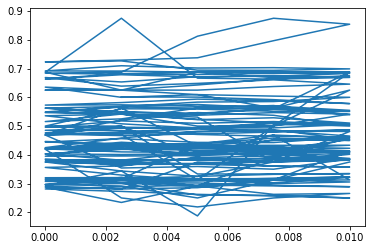

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lr,acc)

In [ ]:
clr = CyclicLR(base_lr=0.001, max_lr=0.006,step_size=2000., mode='triangular2')
model.fit(X_train, Y_train, callbacks=[clr])

##ResNet50V2

In [ ]:
img_size = 224
from keras.applications.resnet_v2 import ResNet50V2
model_finetuned_res50 = ResNet50V2(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
#resizing and shaping images for transfer learning with ResNet151
img=[]
filename=df.Image
for file in filename:
    image=cv2.imread("/content/dataset/train/"+file)
    res=cv2.resize(image,(img_size,img_size))
    img.append(res)
img=np.array(img)
print(img.shape)

94674944/94668760 [==============================] - 3s 0us/step
(364, 224, 224, 3)


In [ ]:
#splitting data for training and validation
train, val = train_test_split(df, test_size = 0.20)

#data augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                    rotation_range=45,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=.1,
                                    fill_mode='nearest',
                                    shear_range=0.3,
                                    rescale=1/255)

train_generator=train_datagen.flow_from_dataframe(train,
                                                  directory='/content/dataset/train/',
                                                  target_size=(img_size,img_size),
                                                  x_col="Image",
                                                  y_col=['bharatanatyam',	'kathak',	'kathakali',	'kuchipudi',	'manipuri'	,'mohiniyattam',	'odissi',	'sattriya'],
                                                  class_mode='raw',
                                                  shuffle=False,
                                                  subset='training',
                                                  batch_size=1)

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator=val_datagen.flow_from_dataframe(val,
                                              directory='/content/dataset/train/',
                                              target_size=(img_size,img_size),
                                              x_col="Image",
                                              y_col=['bharatanatyam',	'kathak',	'kathakali',	'kuchipudi',	'manipuri'	,'mohiniyattam',	'odissi',	'sattriya'],
                                              class_mode='raw',
                                              shuffle=False,
                                              batch_size=1)


test_datagen = ImageDataGenerator(rescale=1/255)
test_generator=val_datagen.flow_from_dataframe(dft,
                                              directory='/content/dataset/test/',
                                              target_size=(img_size,img_size),
                                              x_col="Image",
                                              y_col=None,
                                              class_mode=None,
                                              shuffle=False,
                                              batch_size=1)

Found 291 validated image filenames.
Found 73 validated image filenames.
Found 156 validated image filenames.


In [ ]:
from keras.applications.resnet_v2 import ResNet50V2
model_finetuned_res50 = ResNet50V2(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
x = model_finetuned_res50.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024)(x)
x = Dropout(0.5)(x)
x = Dense(512)(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation="sigmoid")(x)
adam = keras.optimizers.Adam(learning_rate=0.0000005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_finetuned_res50 = Model(inputs=model_finetuned_res50.input, outputs=predictions)
model_finetuned_res50.compile(optimizer=adam,
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])



from livelossplot import PlotLossesKeras
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 30,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.3,
                              patience=3,
                              min_lr=0.000001)

checkpoint = ModelCheckpoint("./resnet50v2-model.{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5",
                             monitor="val_loss",
                             mode="auto",
                             save_best_only = True,
                             verbose=1)

callbacks = [PlotLossesKeras(),reduce_lr,earlystop]

history = model_finetuned_res50.fit_generator(train_generator,
                                        steps_per_epoch=200,
                                        epochs=50,
                                        validation_data=val_generator,
                                        validation_steps=200,
                                        callbacks = callbacks,
                                        use_multiprocessing=False,
                                        shuffle=True)

##ResNet101

In [ ]:
img_size = 224
from keras.applications.resnet import ResNet101
model_finetuned_res101 = ResNet101(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
#resizing and shaping images for transfer learning with ResNet151
img=[]
filename=df.Image
for file in filename:
    image=cv2.imread("/content/dataset/train/"+file)
    res=cv2.resize(image,(img_size,img_size))
    img.append(res)
img=np.array(img)
print(img.shape)

#splitting data for training and validation
train, val = train_test_split(df, test_size = 0.20)

#data augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                    rotation_range=45,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=.1,
                                    fill_mode='nearest',
                                    shear_range=0.3,
                                    rescale=1/255)

train_generator=train_datagen.flow_from_dataframe(train,
                                                  directory='/content/dataset/train/',
                                                  target_size=(img_size,img_size),
                                                  x_col="Image",
                                                  y_col=['bharatanatyam',	'kathak',	'kathakali',	'kuchipudi',	'manipuri'	,'mohiniyattam',	'odissi',	'sattriya'],
                                                  class_mode='raw',
                                                  shuffle=False,
                                                  subset='training',
                                                  batch_size=1)

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator=val_datagen.flow_from_dataframe(val,
                                              directory='/content/dataset/train/',
                                              target_size=(img_size,img_size),
                                              x_col="Image",
                                              y_col=['bharatanatyam',	'kathak',	'kathakali',	'kuchipudi',	'manipuri'	,'mohiniyattam',	'odissi',	'sattriya'],
                                              class_mode='raw',
                                              shuffle=False,
                                              batch_size=1)


test_datagen = ImageDataGenerator(rescale=1/255)
test_generator=val_datagen.flow_from_dataframe(dft,
                                              directory='/content/dataset/test/',
                                              target_size=(img_size,img_size),
                                              x_col="Image",
                                              y_col=None,
                                              class_mode=None,
                                              shuffle=False,
                                              batch_size=1)

171450368/171446536 [==============================] - 4s 0us/step
(364, 224, 224, 3)
Found 291 validated image filenames.
Found 73 validated image filenames.
Found 156 validated image filenames.


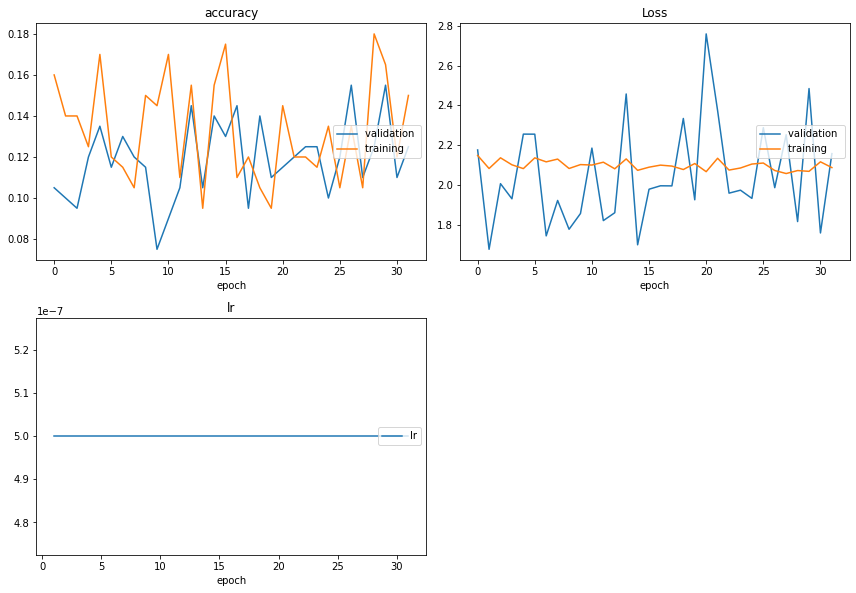

accuracy
	validation       	 (min:    0.075, max:    0.155, cur:    0.125)
	training         	 (min:    0.095, max:    0.180, cur:    0.150)
Loss
	validation       	 (min:    1.677, max:    2.759, cur:    2.158)
	training         	 (min:    2.058, max:    2.149, cur:    2.088)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)
Restoring model weights from the end of the best epoch
Epoch 00032: early stopping


In [ ]:
from keras.applications.resnet import ResNet101
model_finetuned_res101 = ResNet101(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
x = model_finetuned_res101.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024)(x)
x = Dropout(0.5)(x)
x = Dense(512)(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation="sigmoid")(x)
adam = keras.optimizers.Adam(learning_rate=0.0000005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_finetuned_res101 = Model(inputs=model_finetuned_res101.input, outputs=predictions)
model_finetuned_res101.compile(optimizer=adam,
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])



from livelossplot import PlotLossesKeras
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 30,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.3,
                              patience=3,
                              min_lr=0.000001)

checkpoint = ModelCheckpoint("./resnet50v2-model.{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5",
                             monitor="val_loss",
                             mode="auto",
                             save_best_only = True,
                             verbose=1)

callbacks = [PlotLossesKeras(),reduce_lr,earlystop]

history = model_finetuned_res50.fit_generator(train_generator,
                                        steps_per_epoch=200,
                                        epochs=50,
                                        validation_data=val_generator,
                                        validation_steps=200,
                                        callbacks = callbacks,
                                        use_multiprocessing=False,
                                        shuffle=True)

##ResNet151

In [ ]:
img_size = 224

In [ ]:

#resizing and shaping images for transfer learning with ResNet151
img=[]
filename=df.Image
for file in filename:
    image=cv2.imread("/content/dataset/train/"+file)
    res=cv2.resize(image,(img_size,img_size))
    img.append(res)
img=np.array(img)
print(img.shape)

(364, 224, 224, 3)


In [ ]:
#splitting data for training and validation
train, val = train_test_split(df, test_size = 0.25)

#data augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                    vertical_flip=True,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=.1,
                                    fill_mode='nearest',
                                    shear_range=0.1,
                                    rescale=1/255)

train_generator=train_datagen.flow_from_dataframe(train,
                                                  directory='/content/dataset/train/',
                                                  target_size=(img_size,img_size),
                                                  x_col="Image",
                                                  y_col=['bharatanatyam',	'kathak',	'kathakali',	'kuchipudi',	'manipuri'	,'mohiniyattam',	'odissi',	'sattriya'],
                                                  class_mode='raw',
                                                  shuffle=False,
                                                  subset='training',
                                                  batch_size=5)

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator=val_datagen.flow_from_dataframe(val,
                                              directory='/content/dataset/train/',
                                              target_size=(img_size,img_size),
                                              x_col="Image",
                                              y_col=['bharatanatyam',	'kathak',	'kathakali',	'kuchipudi',	'manipuri'	,'mohiniyattam',	'odissi',	'sattriya'],
                                              class_mode='raw',
                                              shuffle=False,
                                              batch_size=5)


test_datagen = ImageDataGenerator(rescale=1/255)
test_generator=val_datagen.flow_from_dataframe(dft,
                                              directory='/content/dataset/test/',
                                              target_size=(img_size,img_size),
                                              x_col="Image",
                                              y_col=None,
                                              class_mode=None,
                                              shuffle=False,
                                              batch_size=1)


Found 273 validated image filenames.
Found 91 validated image filenames.
Found 156 validated image filenames.


In [ ]:
from keras.applications.resnet_v2 import ResNet152V2 
model_finetuned_152 = ResNet152V2(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))

x = model_finetuned_152.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation="sigmoid")(x)

adam = keras.optimizers.Adam(learning_rate=0.000005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_finetuned_152 = Model(inputs=model_finetuned_152.input, outputs=predictions)
model_finetuned_152.compile(optimizer=adam,
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])
model_finetuned_152.summary()

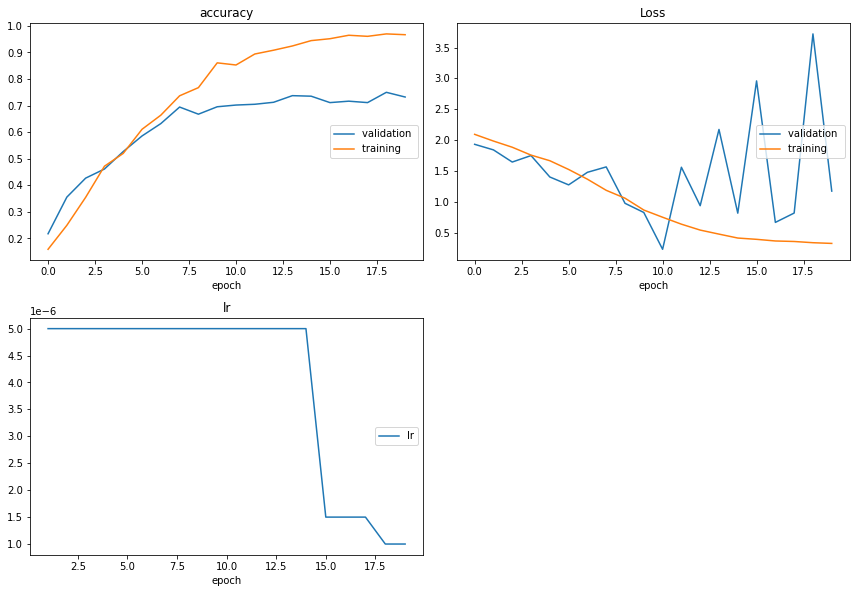

accuracy
	validation       	 (min:    0.218, max:    0.750, cur:    0.732)
	training         	 (min:    0.159, max:    0.970, cur:    0.967)
Loss
	validation       	 (min:    0.230, max:    3.721, cur:    1.173)
	training         	 (min:    0.325, max:    2.093, cur:    0.325)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)

Epoch 00020: val_loss did not improve from 0.22952
Epoch 21/50
169/200 [========================>.....] - ETA: 29s - loss: 0.3250 - accuracy: 0.9701

KeyboardInterrupt: ignored

In [ ]:
from livelossplot import PlotLossesKeras
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 30,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.3,
                              patience=3,
                              min_lr=0.000001)

checkpoint = ModelCheckpoint("./resnet151-model.{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5",
                             monitor="val_loss",
                             mode="auto",
                             save_best_only = True,
                             verbose=1)

callbacks = [PlotLossesKeras(),reduce_lr,earlystop,checkpoint]

history = model_finetuned_152.fit_generator(train_generator,
                                        steps_per_epoch=200,
                                        epochs=50,
                                        validation_data=val_generator,
                                        validation_steps=200,
                                        callbacks = callbacks,
                                        use_multiprocessing=False,
                                        shuffle=True)

In [ ]:
# load weights into new model
model_finetuned_152.load_weights("/content/resnet151-model.11-0.23-0.70.h5")
test_generator.reset()

In [ ]:
#get prediction from test data
pred = model_finetuned_152.predict_generator(test_generator, verbose=1)
classes = pred.argmax(axis=-1)
#print(pred)

156/156 [==============================] - 13s 83ms/step


In [ ]:
import pandas as pd
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      'bharatanatyam':pred[:,0],
                      'kathak':pred[:,1] ,
                      'kathakali':pred[:,2],
                      'kuchipudi':pred[:,3],
                      'manipuri':pred[:,4],
                      'mohiniyattam':pred[:,5],
                      'odissi':pred[:,6],
                      'sattriya':pred[:,7],
                      'class':classes})

results["class"].replace({0: "bharatanatyam",
                               1: "kathak",
                               2: "kathakali",
                               3: "kuchipudi",
                               4: "manipuri",
                               5: "mohiniyattam",
                               6: "odissi",
                               7: "sattriya",
                               }, inplace=True)
results.head(-1)

,Filename,bharatanatyam,kathak,kathakali,kuchipudi,manipuri,mohiniyattam,odissi,sattriya,class
0,508.jpg,0.130744,0.215634,0.009526,0.630246,0.110950,0.018184,0.011960,0.063524,kuchipudi
1,246.jpg,0.127946,0.005501,0.013085,0.021352,0.012164,0.428758,0.222957,0.045385,mohiniyattam
2,473.jpg,0.229606,0.255673,0.016769,0.574273,0.015444,0.008015,0.386881,0.017567,kuchipudi
3,485.jpg,0.409173,0.181878,0.073174,0.182614,0.360783,0.049106,0.088504,0.132445,bharatanatyam
4,128.jpg,0.603590,0.032997,0.006968,0.557062,0.046974,0.007637,0.006305,0.013130,bharatanatyam
...,...,...,...,...,...,...,...,...,...,...
150,275.jpg,0.073985,0.004869,0.003292,0.020547,0.003692,0.631807,0.020025,0.015565,mohiniyattam
151,366.jpg,0.014759,0.075433,0.193936,0.015785,0.014143,0.006580,0.021580,0.275945,sattriya
152,226.jpg,0.040328,0.021795,0.167517,0.032768,0.020599,0.180882,0.361541,0.225703,odissi
153,35.jpg,0.091720,0.209881,0.006322,0.203661,0.092264,0.044424,0.027497,0.110158,kathak


In [ ]:
dft['target'] = results['class']
dft.head()

,Image,target
0,508.jpg,kuchipudi
1,246.jpg,mohiniyattam
2,473.jpg,kuchipudi
3,485.jpg,bharatanatyam
4,128.jpg,bharatanatyam


In [ ]:
dft['target'] = results['class']
dft.to_csv("output.csv",index=False)
output = pd.read_csv("output.csv")
output.head()

,Image,target
0,508.jpg,kuchipudi
1,246.jpg,mohiniyattam
2,473.jpg,kuchipudi
3,485.jpg,bharatanatyam
4,128.jpg,bharatanatyam


##ResNet50

In [ ]:
img_size = 384
from keras.applications.resnet50 import ResNet50
model_finetuned_res50 = ResNet50(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
#resizing and shaping images for transfer learning with ResNet151
img=[]
filename=df.Image
for file in filename:
    image=cv2.imread("/content/dataset/train/"+file)
    res=cv2.resize(image,(img_size,img_size))
    img.append(res)
img=np.array(img)
print(img.shape)

(364, 384, 384, 3)


In [ ]:
#splitting data for training and validation
train, val = train_test_split(df, test_size = 0.20)
bs = 8
#data augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                    vertical_flip=True,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=.1,
                                    fill_mode='nearest',
                                    shear_range=0.1,
                                    rescale=1/255)

train_generator=train_datagen.flow_from_dataframe(train,
                                                  directory='/content/dataset/train/',
                                                  target_size=(img_size,img_size),
                                                  x_col="Image",
                                                  y_col=['bharatanatyam',	'kathak',	'kathakali',	'kuchipudi',	'manipuri'	,'mohiniyattam',	'odissi',	'sattriya'],
                                                  class_mode='raw',
                                                  shuffle=False,
                                                  subset='training',
                                                  batch_size=bs)

val_datagen = ImageDataGenerator(horizontal_flip=True,
                                  vertical_flip=True,
                                  rotation_range=10,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  zoom_range=.1,
                                  fill_mode='nearest',
                                  shear_range=0.1,
                                  rescale=1/255)
val_generator=val_datagen.flow_from_dataframe(val,
                                              directory='/content/dataset/train/',
                                              target_size=(img_size,img_size),
                                              x_col="Image",
                                              y_col=['bharatanatyam',	'kathak',	'kathakali',	'kuchipudi',	'manipuri'	,'mohiniyattam',	'odissi',	'sattriya'],
                                              class_mode='raw',
                                              shuffle=False,
                                              batch_size=bs)


test_datagen = ImageDataGenerator(rescale=1/255)
test_generator=val_datagen.flow_from_dataframe(dft,
                                              directory='/content/dataset/test/',
                                              target_size=(img_size,img_size),
                                              x_col="Image",
                                              y_col=None,
                                              class_mode=None,
                                              shuffle=False,
                                              batch_size=1)

Found 291 validated image filenames.
Found 73 validated image filenames.
Found 156 validated image filenames.


In [ ]:
from keras.applications.resnet50 import ResNet50
model_finetuned_res50 = ResNet50(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
x = model_finetuned_res50.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024)(x)
x = Dropout(0.5)(x)
x = Dense(512)(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation="softmax")(x)
adam = keras.optimizers.Adam(learning_rate=0.000009, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_finetuned_res50 = Model(inputs=model_finetuned_res50.input, outputs=predictions)
model_finetuned_res50.compile(optimizer=adam,
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])
#model_finetuned_res50.summary()

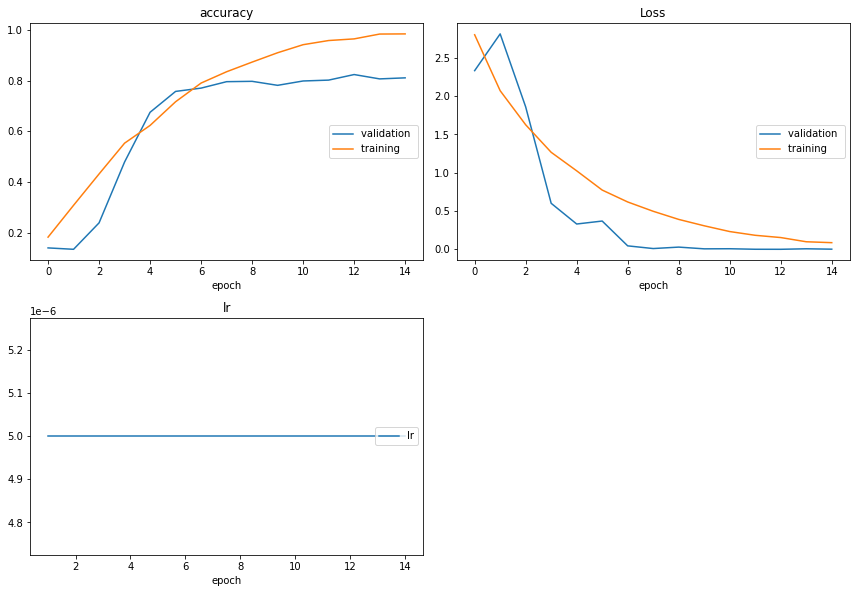

accuracy
	validation       	 (min:    0.136, max:    0.824, cur:    0.811)
	training         	 (min:    0.183, max:    0.984, cur:    0.984)
Loss
	validation       	 (min:    0.000, max:    2.814, cur:    0.002)
	training         	 (min:    0.087, max:    2.803, cur:    0.087)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)
Epoch 16/50
199/200 [============================>.] - ETA: 0s - loss: 0.0767 - accuracy: 0.9878

KeyboardInterrupt: ignored

In [ ]:
from livelossplot import PlotLossesKeras
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 30,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.3,
                              patience=3,
                              min_lr=0.000001)

checkpoint = ModelCheckpoint("./resnet50-model.{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5",
                             monitor="val_loss",
                             mode="auto",
                             save_best_only = True,
                             verbose=1)

callbacks = [PlotLossesKeras(),reduce_lr,earlystop]

history = model_finetuned_res50.fit_generator(train_generator,
                                        steps_per_epoch=200,
                                        epochs=50,
                                        validation_data=val_generator,
                                        validation_steps=200,
                                        callbacks = callbacks,
                                        use_multiprocessing=False,
                                        shuffle=True)

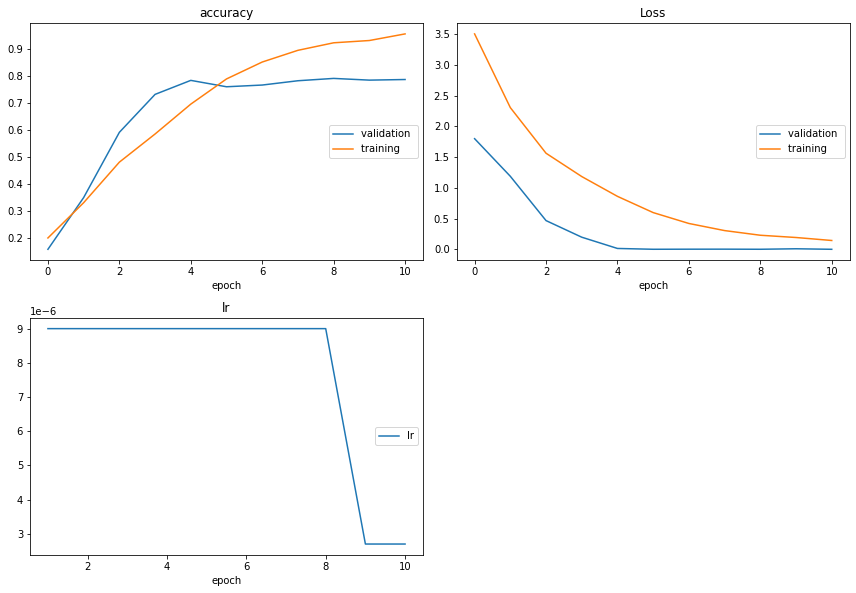

accuracy
	validation       	 (min:    0.157, max:    0.792, cur:    0.788)
	training         	 (min:    0.199, max:    0.957, cur:    0.957)
Loss
	validation       	 (min:    0.000, max:    1.800, cur:    0.000)
	training         	 (min:    0.143, max:    3.505, cur:    0.143)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)
Epoch 12/50
174/300 [================>.............] - ETA: 49s - loss: 0.1534 - accuracy: 0.9488

KeyboardInterrupt: ignored

In [ ]:
from livelossplot import PlotLossesKeras
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

earlystop = EarlyStopping(monitor = 'val_accuracy', 
                          min_delta = 0, 
                          patience = 30,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.3,
                              patience=3,
                              min_lr=0.000001)

checkpoint = ModelCheckpoint("./resnet50-model.{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5",
                             monitor="val_loss",
                             mode="auto",
                             save_best_only = True,
                             verbose=1,)

callbacks = [PlotLossesKeras(),reduce_lr,earlystop]

history = model_finetuned_res50.fit_generator(train_generator,
                                        steps_per_epoch=300,
                                        epochs=50,
                                        validation_data=val_generator,
                                        validation_steps=300,
                                        callbacks = callbacks,
                                        use_multiprocessing=False,
                                        shuffle=True)

In [ ]:
from keras.models import load_model
model = load_model('/content/resnet50-model.21-0.08-0.80.h5')

In [ ]:
model.summary()

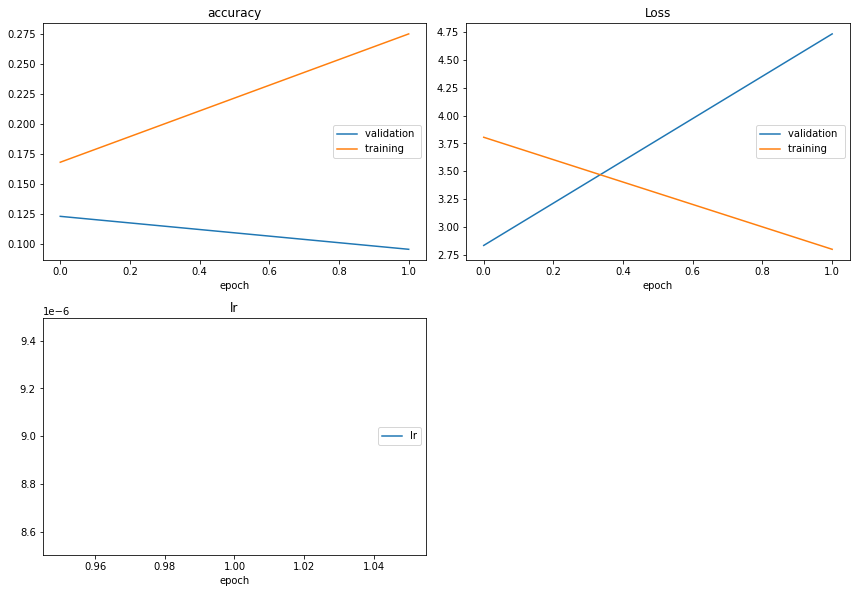

accuracy
	validation       	 (min:    0.096, max:    0.123, cur:    0.096)
	training         	 (min:    0.168, max:    0.275, cur:    0.275)
Loss
	validation       	 (min:    2.833, max:    4.735, cur:    4.735)
	training         	 (min:    2.798, max:    3.806, cur:    2.798)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)


In [ ]:
model_finetuned_res50 = pretrained(model="ResNet50", batch_size=8, epochs=2)

In [ ]:
# load weights into new model
model_finetuned_res50.load_weights("/content/model.29-0.01-0.84.h5")
test_generator.reset()

In [ ]:
#get prediction from test data
pred = model_finetuned_res50.predict_generator(test_generator, verbose=1)
classes = pred.argmax(axis=-1)
#print(pred)
import pandas as pd
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      'bharatanatyam':pred[:,0],
                      'kathak':pred[:,1] ,
                      'kathakali':pred[:,2],
                      'kuchipudi':pred[:,3],
                      'manipuri':pred[:,4],
                      'mohiniyattam':pred[:,5],
                      'odissi':pred[:,6],
                      'sattriya':pred[:,7],
                      'class':classes})

results["class"].replace({0: "bharatanatyam",
                               1: "kathak",
                               2: "kathakali",
                               3: "kuchipudi",
                               4: "manipuri",
                               5: "mohiniyattam",
                               6: "odissi",
                               7: "sattriya",
                               }, inplace=True)
results.head(-1)

156/156 [==============================] - 9s 59ms/step


,Filename,bharatanatyam,kathak,kathakali,kuchipudi,manipuri,mohiniyattam,odissi,sattriya,class
0,508.jpg,0.004343,0.000516,2.474301e-04,0.020192,3.228251e-04,1.037882e-03,0.972803,5.381702e-04,odissi
1,246.jpg,0.004862,0.000661,2.327150e-03,0.026849,5.740466e-04,9.277467e-01,0.002879,3.410067e-02,mohiniyattam
2,473.jpg,0.001352,0.001775,9.732472e-04,0.075261,6.931609e-04,1.145923e-02,0.906720,1.766400e-03,odissi
3,485.jpg,0.012502,0.004040,4.558841e-02,0.918430,6.823978e-03,8.245510e-04,0.006434,5.356327e-03,kuchipudi
4,128.jpg,0.999708,0.000014,6.062987e-07,0.000235,1.647025e-06,2.170613e-05,0.000009,1.026696e-05,bharatanatyam
...,...,...,...,...,...,...,...,...,...,...
150,275.jpg,0.030624,0.019700,1.076655e-02,0.042292,7.084394e-03,8.553454e-01,0.002249,3.193897e-02,mohiniyattam
151,366.jpg,0.001272,0.018253,8.359981e-03,0.003598,1.192339e-02,2.861007e-04,0.004693,9.516137e-01,sattriya
152,226.jpg,0.000059,0.000001,3.918062e-01,0.000473,6.058973e-01,1.253888e-03,0.000180,3.294220e-04,manipuri
153,35.jpg,0.396988,0.515785,1.103386e-03,0.063529,2.310385e-03,1.219710e-03,0.016154,2.909608e-03,kathak


In [ ]:
dft['target'] = results['class']
dft.to_csv("output.csv",index=False)
output = pd.read_csv("output.csv")
output.head()

,Image,target
0,508.jpg,odissi
1,246.jpg,mohiniyattam
2,473.jpg,odissi
3,485.jpg,kuchipudi
4,128.jpg,bharatanatyam


##Xception

In [ ]:
img_size = 299
from keras.applications.xception import Xception
model_finetuned_xcep = Xception(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
#resizing and shaping images for transfer learning with ResNet151
img=[]
filename=df.Image
for file in filename:
    image=cv2.imread("/content/dataset/train/"+file)
    res=cv2.resize(image,(img_size,img_size))
    img.append(res)
img=np.array(img)
print(img.shape)

(364, 299, 299, 3)


In [ ]:
#splitting data for training and validation
train, val = train_test_split(df, test_size = 0.20)

#data augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                    vertical_flip=True,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=.2,
                                    fill_mode='nearest',
                                    shear_range=0.3,
                                    rescale=1/255)

train_generator=train_datagen.flow_from_dataframe(train,
                                                  directory='/content/dataset/train/',
                                                  target_size=(img_size,img_size),
                                                  x_col="Image",
                                                  y_col=['bharatanatyam',	'kathak',	'kathakali',	'kuchipudi',	'manipuri'	,'mohiniyattam',	'odissi',	'sattriya'],
                                                  class_mode='raw',
                                                  shuffle=False,
                                                  subset='training',
                                                  batch_size=5)

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator=val_datagen.flow_from_dataframe(val,
                                              directory='/content/dataset/train/',
                                              target_size=(img_size,img_size),
                                              x_col="Image",
                                              y_col=['bharatanatyam',	'kathak',	'kathakali',	'kuchipudi',	'manipuri'	,'mohiniyattam',	'odissi',	'sattriya'],
                                              class_mode='raw',
                                              shuffle=False,
                                              batch_size=5)


test_datagen = ImageDataGenerator(rescale=1/255)
test_generator=val_datagen.flow_from_dataframe(dft,
                                              directory='/content/dataset/test/',
                                              target_size=(img_size,img_size),
                                              x_col="Image",
                                              y_col=None,
                                              class_mode=None,
                                              shuffle=False,
                                              batch_size=1)

Found 291 validated image filenames.
Found 73 validated image filenames.
Found 156 validated image filenames.


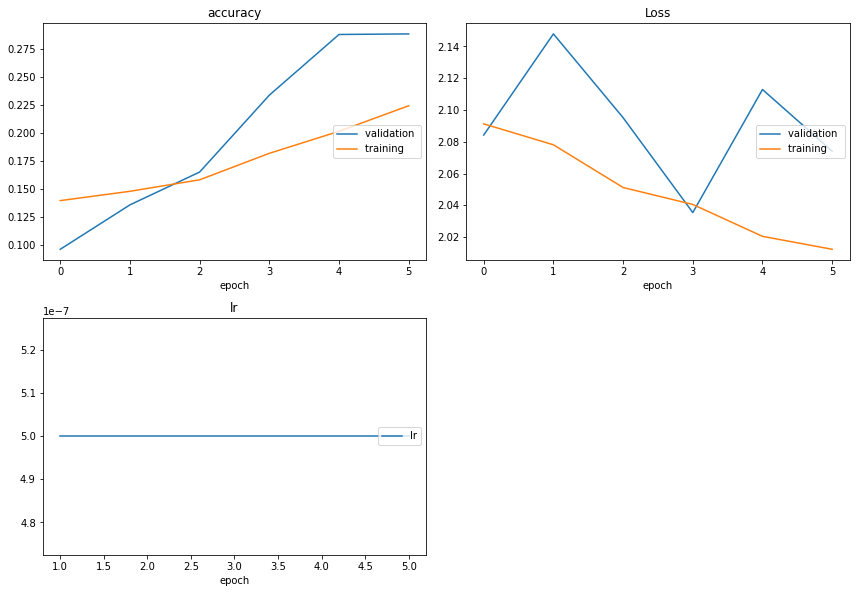

accuracy
	validation       	 (min:    0.096, max:    0.288, cur:    0.288)
	training         	 (min:    0.139, max:    0.224, cur:    0.224)
Loss
	validation       	 (min:    2.035, max:    2.148, cur:    2.074)
	training         	 (min:    2.012, max:    2.091, cur:    2.012)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)
Epoch 7/50
399/400 [============================>.] - ETA: 0s - loss: 1.9891 - accuracy: 0.2420

KeyboardInterrupt: ignored

In [ ]:
from keras.applications.xception import Xception
model_finetuned_xcep = Xception(include_top=False, weights='imagenet', input_shape=(img_size,img_size,3))
x = model_finetuned_xcep.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024)(x)
x = Dropout(0.5)(x)
#x = Dense(512)(x)
#x = Dropout(0.5)(x)
predictions = Dense(8, activation="sigmoid")(x)
adam = keras.optimizers.Adam(learning_rate=0.0000005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_finetuned_xcep = Model(inputs=model_finetuned_xcep.input, outputs=predictions)
model_finetuned_xcep.compile(optimizer=adam,
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])
#model_finetuned_xcep.summary()

from livelossplot import PlotLossesKeras
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 30,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.3,
                              patience=3,
                              min_lr=0.000001)

checkpoint = ModelCheckpoint("./xcep-model.{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5",
                             monitor="val_loss",
                             mode="auto",
                             save_best_only = True,
                             verbose=1)

callbacks = [PlotLossesKeras(),reduce_lr,earlystop]

history = model_finetuned_xcep.fit_generator(train_generator,
                                        steps_per_epoch=400,
                                        epochs=50,
                                        validation_data=val_generator,
                                        validation_steps=400,
                                        callbacks = callbacks,
                                        use_multiprocessing=False,
                                        shuffle=True)

In [ ]:
from keras.models import load_model
model = load_model('/content/resnet50-model.21-0.08-0.80.h5')
#get prediction from test data
pred = model_finetuned_xcep.predict_generator(test_generator, verbose=1)
classes = pred.argmax(axis=-1)
#print(pred)
import pandas as pd
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      'bharatanatyam':pred[:,0],
                      'kathak':pred[:,1] ,
                      'kathakali':pred[:,2],
                      'kuchipudi':pred[:,3],
                      'manipuri':pred[:,4],
                      'mohiniyattam':pred[:,5],
                      'odissi':pred[:,6],
                      'sattriya':pred[:,7],
                      'class':classes})

results["class"].replace({0: "bharatanatyam",
                               1: "kathak",
                               2: "kathakali",
                               3: "kuchipudi",
                               4: "manipuri",
                               5: "mohiniyattam",
                               6: "odissi",
                               7: "sattriya",
                               }, inplace=True)
results.head(-1)

In [ ]:
dft['target'] = results['class']
dft.to_csv("output.csv",index=False)
output = pd.read_csv("output.csv")
output.head()